a. scatter plot
b. algebra practice
c. projectiles

Note: Choosing projectiles will end the program after the game.
Please enter a positive integer.

Round 1


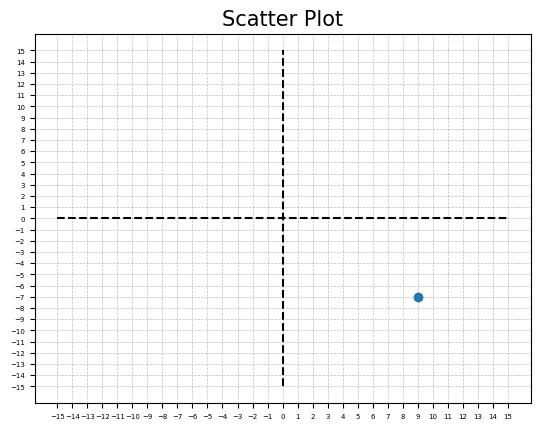

Input is empty or incomplete.
The correct answer was (9,-7).

Round 2


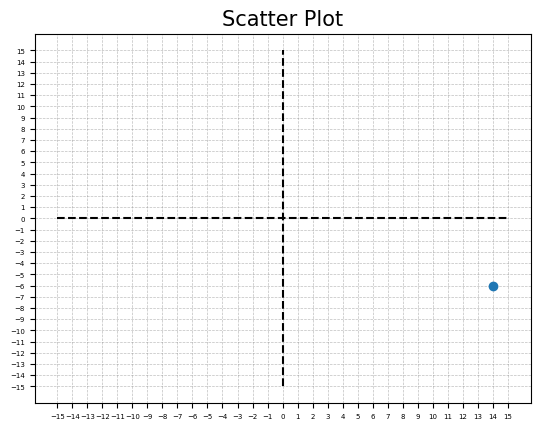

Correct!

Score: 1/2
a. scatter plot
b. algebra practice
c. projectiles

Note: Choosing projectiles will end the program after the game.

Round 1

Solve for x:
-17 + x = 135
Input is empty.
The correct answer was 152.

Solve for x:
60 + x = 98
Input is empty.
The correct answer was 38.

Solve for x:
18x = 19
Round to two decimal places.
Input is empty.
The correct answer was 1.06.

Solve for x:
x/25 = 16
Input is empty.
The correct answer was 400.

Solve for x:
6x + 95 = 138
Round to two decimal places.
Input is empty.
The correct answer was 7.17.

Solve for x:
12x + 8 = 32
Round to two decimal places.
Input is empty.
The correct answer was 2.0.

Solve for x:
25x + -5 = -33
Round to two decimal places.
Input is empty.
The correct answer was -1.12.

Score: 1/9
a. scatter plot
b. algebra practice
c. projectiles

Note: Choosing projectiles will end the program after the game.


interactive(children=(IntSlider(value=15, description='initialVelocity', max=30), IntSlider(value=57, descript…

Coordinates at wall: (6.0, 15.11)
Rocket does not hit wall.

Final score: 2/10
Thanks for playing!


In [1]:
# LIBRARIES
import matplotlib.pyplot as plt
from random import randint
from inspect import stack
from numpy import linspace, cos, tan, radians, array
from ipywidgets import interactive, fixed, Button
from IPython.display import display


# * HELPER FUNCTIONS
# ASK FOR THE NUMBER OF QUESTIONS
def ask_rounds():
    while True:
        try:
            # ! ASK FOR THE NUMBER OF QUESTIONS
            rounds = int(input("\nHow many rounds would you like to play? "))
            if rounds < 1:
                print("Please enter a positive integer.")
                continue
            return rounds
        except ValueError:
            # ! INVALID INPUT
            print("Please enter a positive integer.")
            continue


# ASK USER IF THEY WANT TO PLAY AGAIN
def ask_playAgain():
    while True:
        try:
            # Ask user if they want to play again
            playAgain = input("Would you like to play again? (y/n): ")
            if playAgain.lower() == "y":
                # Restart program
                return main(options)
            elif playAgain.lower() == "n":
                # End program with final score and thank you message
                return print(f"\nFinal score: {score['correct']}/{score['total']}\nThanks for playing!")
            print("Please enter y or n.")
        except ValueError:
            # ! INVALID INPUT
            print("Please enter y or n.")
            continue


# SET GRAPH DESIGN
def set_graphDesign(graphDimensions, fontSize):
    # Initialize graph
    fig, ax = plt.subplots()
    # Set axis lines to dashed black
    plt.plot([graphDimensions['xmin'], graphDimensions['xmax']], [0, 0], 'k--')
    plt.plot([0, 0], [graphDimensions['ymin'], graphDimensions['ymax']], 'k--')
    # Show grid with 0.5 spacing
    plt.xticks(range(graphDimensions['xmin'], graphDimensions['xmax']+1), fontsize=[fontSize - 10 if stack()[1][3] == 'graph_scatter' else fontSize][0])
    plt.yticks(range(graphDimensions['ymin'], graphDimensions['ymax']+1), fontsize=[fontSize - 10 if stack()[1][3] == 'graph_scatter' else fontSize][0])
    plt.grid(which='both', ls='--', lw=0.5, color='gray', alpha=0.5)
    # Set title
    plt.title(f"{options[selectedOption[0]].__name__.replace('_',' ').title()}", fontsize=[fontSize + 5 if stack()[1][3] == 'projectiles' else fontSize][0])
    return


# CREATE SCATTER PLOT
def graph_scatter(graphDimensions, fontSize):
    # ! SET GRAPH DESIGN
    set_graphDesign(graphDimensions, fontSize)
    # ! SCATTER PLOT
    # Create a random point
    x, y = randint(graphDimensions['xmin'], graphDimensions['xmax']), randint(graphDimensions['ymin'], graphDimensions['ymax'])
    # Plot the point
    plt.plot(x, y, 'o')
    # Store point in answer
    answer = [x, y]
    # Show graph
    show_graph(True)
    return answer


def graph_projectile(initialVelocity, angle, wallDimensions, graphDimensions, fontSize, score):
    # ! SET GRAPH DESIGN
    set_graphDesign(graphDimensions, fontSize)    
    # ! PLOT TRAGECTORY
    # Initialize variables
    x = linspace(0, graphDimensions['xmax'], 100)
    gravity = 9.81
    # Convert angle to radians
    angle = radians(angle)
    # Calculate y values
    y = x * tan(angle) - (1/2) * (gravity * x**2) / (initialVelocity**2 * (cos(angle))**2)
    # Initialize a mask that removes any values that are outside the graph
    mask = (y >= graphDimensions['ymin']) & (y <= graphDimensions['ymax'])
    # Store masked x and y values into coordinates
    coordinates = [x[mask], y[mask]]
    # Plot trajectory
    plt.plot(*coordinates, '-')
    # ! PLOT ROCKET
    # Plot rocket starting position
    plt.plot(0,0,'ro')
    # Show coordinates of rocket
    plt.text(0.3, 0.3, f"Rocket: (0, 0)", fontsize=fontSize)
    # ! PLOT WALL
    # Plot wall
    plt.plot(wallDimensions['x'], wallDimensions['y'], color='midnightblue', linewidth=5)
    # Show coordinates of wall
    plt.text(wallDimensions['x'][0] + 0.3, wallDimensions['y'][1] + 0.3, f"Wall: ({wallDimensions['x'][0]}, {wallDimensions['y'][1]})", fontsize=fontSize)
    # Show graph
    show_graph(True)
    # ! SHOW BUTTON
    # Create a button to submit trajectory
    button = Button(description="Submit Trajectory", button_style='success', layout={'width': 'auto'})
    # Place button below graph
    display(button)
    # Set display attribute to true
    # ! FUNCTION TO SUBMIT TRAJECTORY
    def submit_trajectory(x):
        # Derive a shorter set of coordinates from current coordinates
        x = array(range(0, graphDimensions['xmax']))
        y = x * tan(angle) - (1/2) * (gravity * x**2) / (initialVelocity**2 * (cos(angle))**2)
        # Disable button
        button.disabled = True
        # ! CHECK IF TRAJECTORY DOES NOT HIT WALL
        # Increment total score
        score['total'] += 1
        # Check if trajectory hits wall
        if check_trajectory([x,y], wallDimensions, graphDimensions):
            # Increment correct score
            score['correct'] += 1
        # ! END GAME
        return print(f"\nFinal score: {score['correct']}/{score['total']}\nThanks for playing!")
    # Call submit_trajectory when button is clicked
    submit = button.on_click(submit_trajectory)
    return submit


# CHECK IF TRAJECTORY HITS WALL
def check_trajectory(coordinates, wallDimensions, graphDimensions):
    # ! CHECK IF TRAJECTORY DOES NOT HIT WALL
    # Find coordinates at wall
    for i in range(len(coordinates[0])):
        if coordinates[0][i] == wallDimensions['x'][0]:
            coordinates = [[coordinates[0][i]], [coordinates[1][i]]]
            break
    # Print coordinates at wall
    print(f"Coordinates at wall: ({float(coordinates[0][0])}, {round(coordinates[1][0],2)})")
    # ! CHECK IF TRAJECTORY REACHES WALL
    if coordinates[1][0] < graphDimensions['ymin']:
        print("Rocket does not reach wall.")
        return False
    # ! CHECK IF TRAJECTORY HITS WALL
    if coordinates[1][0] <= wallDimensions['y'][1]:
        print("Rocket hits wall.")
        return False
    print("Rocket does not hit wall.")
    return True


# SHOW AND CLOSE GRAPH
def show_graph(showStatus):
    if showStatus == False:
        # ! CLOSE GRAPH
        plt.close()
        return plt.ioff()
    # ! SHOW GRAPH
    plt.ion()
    return plt.show()


# VALIDATE IF GUESS IS EMPTY
def guess_empty(guess, function):
    # Check if function was called from check_scatter
    if function == 'check_scatter':
        # ! CHECK IF GUESS IS EMPTY OR INCOMPLETE
        if guess == '' or guess.count(',') != 1:
            print("Input is empty or incomplete.")
            return True
    # ! CHECK IF GUESS IS EMPTY
    if guess == '':
        print("Input is empty.")
        return True
    # Guess is not empty
    return False


# VALIDATE IF GUESS IS A NUMBER
def guess_number(guess, function):
    # Check if function was called from check_scatter
    if function == 'check_scatter':
        # Separate user input into x and y coordinates
        guess = guess.split(',')
        x, y = guess[0].strip().replace('(',''), guess[1].strip().replace(')','')
        # ! REMOVE NEGATIVE SIGN THEN CHECK IF X OR Y IS NOT AN INTEGER
        if x.replace('-','').isdigit() == False or y.replace('-','').isdigit() == False:
            print("Either x or y is not an integer.")
            return True
        return False
    # ! CHECK IF GUESS IS NOT A NUMBER
    try:
        # Convert guess to float
        guess = float(guess)
    except ValueError:
        # Invalid input
        print("Input is not a number.")
        return True
    # Guess is a number
    return False


# COMBINE VALIDATION FUNCTIONS
def guess_validate(guess):
    # Check if guess is empty or incomplete
    if guess_empty(guess, stack()[1][3]):
        return True
    # Check if guess is not a number
    if guess_number(guess, stack()[1][3]):
        return True
    # ! GUESS IS VALID
    return False


# CHECK SCATTER PLOT ANSWER
def check_scatter(guess, answer, score):
    # ! INCREMENT TOTAL SCORE
    score['total'] += 1
    # ! CHECK IF GUESS IS VALID
    if guess_validate(guess):
        # Print correct answer if guess is invalid
        print(f"The correct answer was ({answer[0]},{answer[1]}).")
        return score
    # Separate user input into x and y coordinates
    guess = guess.split(',')
    x, y = guess[0].strip().replace('(',''), guess[1].strip().replace(')','')
    # ! CHECK IF GUESS IS CORRECT
    if int(x) == int(answer[0]) and int(y) == int(answer[1]):
        print("Correct!")
        score['correct'] += 1
        return score
    # Print correct answer
    print(f"Sorry, the correct answer was ({answer[0]},{answer[1]}).")
    return score


# RETURN FINAL SCORE
def return_score(score):
    # Print final score
    print(f"\nScore: {score['correct']}/{score['total']}")
    # Return score
    return score


# CHECK ALGEBRA ANSWER
def check_algebra(answer):
    # Get user input
    guess = input("x = ")
    # ! INCREMENT TOTAL SCORE
    score['total'] += 1
    # ! CHECK IF GUESS IS VALID
    if guess_validate(guess):
        # Print correct answer if guess is invalid
        print(f"The correct answer was {answer}.")
        return score
    # ! CHECK IF GUESS IS CORRECT
    if float(guess) == float(answer):
        print("Correct!")
        score['correct'] += 1
        return score
    return score


# GENERATE ADDITION AND SUBTRACTION QUESTION
def add_subtract(operation):
    # ! ADDITION
    if operation == 'add':
        # Generate random numbers
        a, b = randint(-50, 100), randint(0, 150)
        # Print question
        print(f"\nSolve for x:\n{a} + x = {b}")
    # ! SUBTRACTION
    else:
        # Generate random numbers
        a, b = randint(1, 150), randint(-50, 100)
        # Print question
        print(f"\nSolve for x:\n{a} + x = {b}")
    # ! STORE ANSWER
    answer = b - a
    # Get user input, then validate and check answer and return score
    return check_algebra(answer)


# GENERATE MULTIPLICATION QUESTION
def multiply():
    # Generate random numbers
    a, b = randint(1, 25), randint(2, 30)
    # Print question
    print(f"\nSolve for x:\n{a}x = {b}\nRound to two decimal places.")
    # ! STORE ANSWER
    answer = round(b / a, 2)
    # Check answer and return score
    return check_algebra(answer)


# GENERATE DIVISION QUESTION
def divide():
    # Generate random numbers
    a, b = randint(2, 30), randint(1, 45)
    # Print question
    print(f"\nSolve for x:\nx/{a} = {b}")
    # ! STORE ANSWER
    answer = b * a
    # Check answer and return score
    return check_algebra(answer)


# GENERATE TWO-STEP EQUATION QUESTION
def x():
    # Generate random numbers
    a, b, c = randint(1, 25), randint(-50, 150), randint(-50, 150)
    # Print question
    print(f"\nSolve for x:\n{a}x + {b} = {c}\nRound to two decimal places.")
    # ! STORE ANSWER
    answer = round((c - b) / a, 2)
    # Check answer and return score
    return check_algebra(answer)


# * FUNCTIONS
# SCATTER PLOT GAME
def scatter_plot():
    global score
    # Ask for the number of rounds
    rounds = ask_rounds()
    # Initialize variables
    graphDimensions = {'xmin': -15, 'ymin': -15, 'xmax': 15, 'ymax': 15}
    fontSize = max(9, (graphDimensions['xmax'] - graphDimensions['xmin']) / 2)
    # Start game
    for i in range(0, rounds):
        # ! PRINT ROUND
        print(f"\nRound {i+1}")
        # ! CREATE GRAPH
        answer = graph_scatter(graphDimensions, fontSize)
        # Ask for the coordinates
        guess = input("Enter the coordinates of the point (x,y): ")
        # ! VALIDATE AND CHECK ANSWER
        score = check_scatter(guess, answer, score)
        # Close graph
        plt.close()
    return return_score(score)


# ALGEBRA PRACTICE GAME
def algebra_practice():
    # Ask for the number of rounds
    rounds = ask_rounds()
    # Start game
    for i in range(rounds):
        # Print round number
        print(f"\nRound {i + 1}")
        # ! GENERATE QUESTIONS
        score = add_subtract('add')
        score = add_subtract('subtract')
        score = multiply()
        score = divide()
        for j in range(3): score = x()
    return return_score(score)


# PROJECTILE GAME
def projectiles():
    global score
    # ! START GAME
    # Initialize variables
    distance = randint(5, 15)
    wallDimensions = {'x': [distance, distance], 'y': [0, randint(5, 20)]}
    graphDimensions = {'xmin': -1, 'ymin': -1, 'xmax': wallDimensions['x'][0] + 3, 'ymax': wallDimensions['y'][1] + 10}
    fontSize = max(9, 5 * min((graphDimensions['xmax'] - graphDimensions['xmin']) / distance, (graphDimensions['ymax'] - graphDimensions['ymin']) / distance))
    # ! CREATE AND DISPLAY GRAPH
    interactive_plot = interactive(graph_projectile, initialVelocity=(0,30), angle=(25,90),wallDimensions=fixed(wallDimensions), graphDimensions=fixed(graphDimensions), fontSize=fixed(fontSize), score=fixed(score))
    display(interactive_plot)   
    return


# INITIALIZE VARIABLES
options = {'a': scatter_plot, 'b': algebra_practice, 'c': projectiles}
score = {'correct': 0, 'total': 0}


# MENU SELECTION
def menu(options):
    while True:
        # Print the options
        for key, value in options.items():
            print(f"{key}. {value.__name__.replace('_',' ')}")
        # Prompt user that choosing projectiles will end the program after the game
        print("\nNote: Choosing projectiles will end the program after the game.")
        # Get the user's choice
        selectedOption = input("\nSelect a game to play (only enter the letter): ")
        # Validate the user's choice
        if selectedOption.replace('.','').lower() in options:
            selectedOption = selectedOption.replace('.','').lower() # ! ensure option is lowercase and without a period
            return selectedOption, options[selectedOption]
        print(f"\n {selectedOption} is not a valid option. Please try again.") # print error message if invalid and try again


# * MAIN FUNCTION
def main(options):
    global score, selectedOption
    # Menu selection
    selectedOption = menu(options)
    # Call the function based on the user's choice
    score = options.get(selectedOption[0], lambda: print("Error: Invalid option."))()
    # Check if user called projectiles
    if selectedOption[0] == 'c':
        return
    # Ask user if they want to play again
    return ask_playAgain()


# * RUN PROGRAM
if __name__ == "__main__":
    main(options)